In [1]:
import pandas as pd
import numpy as np
import csv

In [5]:
df1 = pd.read_csv('Taipei_Merto_station_travel_time.csv', encoding='big5')
df1

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
0,1,淡水-象山,捷運淡水站,捷運紅樹林站,175,1,0
1,2,淡水-象山,捷運紅樹林站,捷運竹圍站,138,2,25
2,3,淡水-象山,捷運竹圍站,捷運關渡站,148,3,25
3,4,淡水-象山,捷運關渡站,捷運忠義站,80,4,25
4,5,淡水-象山,捷運忠義站,捷運復興崗站,112,5,25
...,...,...,...,...,...,...,...
181,182,新北產業園區-大坪林,捷運中和站,捷運景安站,194,9,25
182,183,新北產業園區-大坪林,捷運景安站,捷運景平站,84,10,35
183,184,新北產業園區-大坪林,捷運景平站,捷運秀朗橋站,79,11,25
184,185,新北產業園區-大坪林,捷運秀朗橋站,捷運十四張站,111,12,23


In [13]:
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family = "ChineseFont")

In [7]:
# Remove duplicate or irrelevant columns
df1.drop(columns=['SeqNo.1'], inplace=True)

# Display basic information about the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SeqNo       186 non-null    int64 
 1   stationbus  186 non-null    object
 2   stationA    186 non-null    object
 3   stationB    186 non-null    object
 4   traveltime  186 non-null    int64 
 5   stoptime    186 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 8.8+ KB
None


In [17]:
eng = {'七張-小碧潭':'Green', '動物園-南港展覽館':'Brown', '北投-大安':'Red', '北投-新北投':'Red', '南勢角-蘆洲':'Orange','南勢角-迴龍':'Orange', '南港展覽館-亞東醫院':"Blue", '南港展覽館-頂埔':"Blue", '新北產業園區-大坪林':"Yellow",'松山-台電大樓':"Green", '松山-新店':"Green", '淡水-象山':'Red'}
df1['stationbus'] = df1['stationbus'].map(eng)
df1

,SeqNo,stationbus,stationA,stationB,traveltime,stoptime
0,1,Red,捷運淡水站,捷運紅樹林站,175,0
1,2,Red,捷運紅樹林站,捷運竹圍站,138,25
2,3,Red,捷運竹圍站,捷運關渡站,148,25
3,4,Red,捷運關渡站,捷運忠義站,80,25
4,5,Red,捷運忠義站,捷運復興崗站,112,25
...,...,...,...,...,...,...
181,182,Yellow,捷運中和站,捷運景安站,194,25
182,183,Yellow,捷運景安站,捷運景平站,84,35
183,184,Yellow,捷運景平站,捷運秀朗橋站,79,25
184,185,Yellow,捷運秀朗橋站,捷運十四張站,111,23


     Line  AverageTravelTime
0    Blue          98.875000
1   Brown          91.304348
2   Green          98.833333
3  Orange         113.750000
4     Red          94.863636
5  Yellow         124.384615


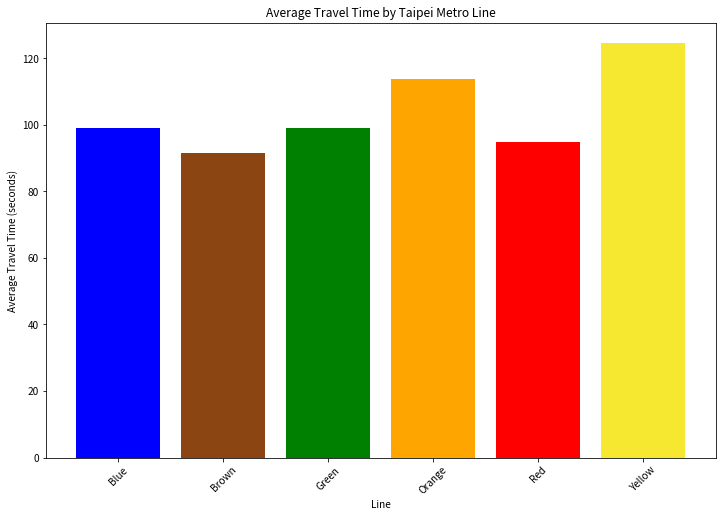

In [21]:
average_travel_time_by_line = df1.groupby('stationbus')['traveltime'].mean().reset_index()

# Rename the columns for clarity
average_travel_time_by_line.columns = ['Line', 'AverageTravelTime']

# Display the result
print(average_travel_time_by_line)

# Visualize the data (example using matplotlib)
import matplotlib.pyplot as plt


line_colors = {
    'Red': '#FF0000',
    'Blue': '#0000FF', 
    'Green': '#008000',
    'Orange': '#FFA500',
    'Brown': '#8B4513',
    'Yellow': '#f6e731', 
}

# Get the colors for each line
colors = [line_colors[line] for line in average_travel_time_by_line['Line']]

# Plot average travel time by line
plt.figure(figsize=(12, 8))
plt.bar(average_travel_time_by_line['Line'], average_travel_time_by_line['AverageTravelTime'], color=colors)
plt.xlabel('Line')
plt.ylabel('Average Travel Time (seconds)')
plt.title('Average Travel Time by Taipei Metro Line')
plt.xticks(rotation=45)
plt.show()

     Line  AverageStopTime
0    Blue        28.150000
1   Brown        25.217391
2   Green        27.433333
3  Orange        27.166667
4     Red        25.568182
5  Yellow        25.307692


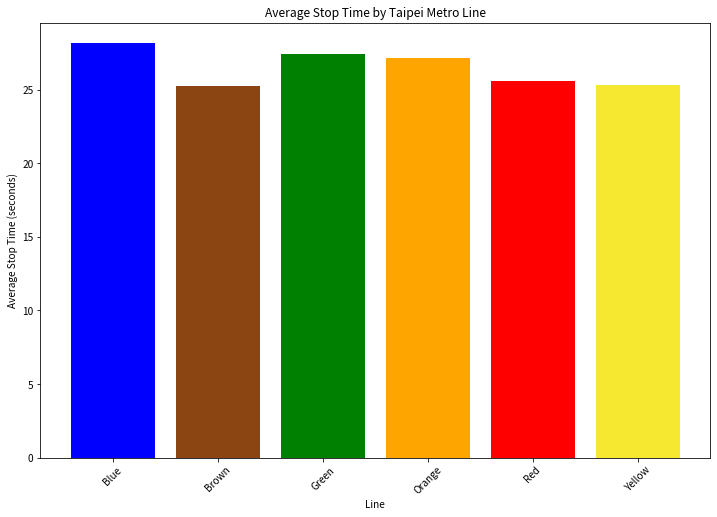

In [25]:
average_stop_time_by_line = df1.groupby('stationbus')['stoptime'].mean().reset_index()

# Rename the columns for clarity
average_stop_time_by_line.columns = ['Line', 'AverageStopTime']

# Display the result
print(average_stop_time_by_line)

# Visualize the data (example using matplotlib)
import matplotlib.pyplot as plt

line_colors = {
    'Red': '#FF0000',
    'Blue': '#0000FF', 
    'Green': '#008000', 
    'Orange': '#FFA500',
    'Brown': '#8B4513',    
    'Yellow': '#f6e731',
}

# Get the colors for each line
colors = [line_colors[line] for line in average_stop_time_by_line['Line']]

# Plot average travel time by line
plt.figure(figsize=(12, 8))
plt.bar(average_stop_time_by_line['Line'], average_stop_time_by_line['AverageStopTime'], color=colors)
plt.xlabel('Line')
plt.ylabel('Average Stop Time (seconds)')
plt.title('Average Stop Time by Taipei Metro Line')
plt.xticks(rotation=45)
plt.show()

Transactions that require attention:
    stationbus stationA stationB  traveltime
148     Orange    捷運東門站    捷運古亭站         208
168     Orange    捷運東門站    捷運古亭站         208
72       Green    捷運七張站   捷運小碧潭站         203
181     Yellow    捷運中和站    捷運景安站         194
87        Blue   捷運龍山寺站   捷運江子翠站         192


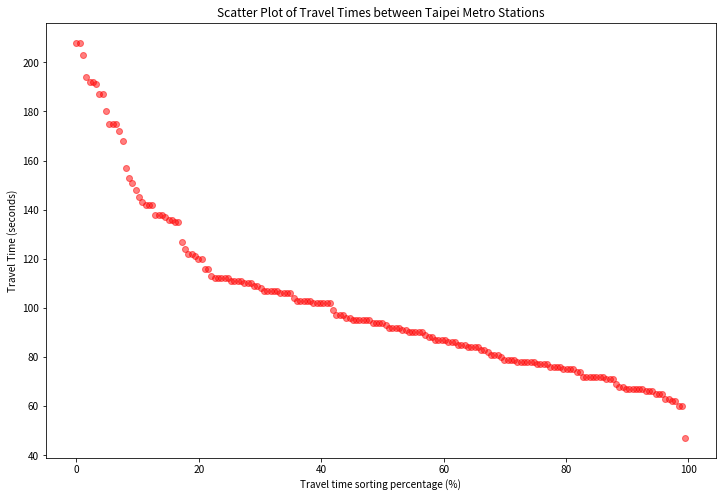

In [37]:
sorted_dataset = df1.sort_values(by='traveltime', ascending=False)

# Display the top 5 records that require attention due to long travel times
attention_needed = sorted_dataset.head(5)
print("Transactions that require attention:")
print(attention_needed[['stationbus', 'stationA', 'stationB', 'traveltime']])

# Generate a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter([i/len(df1)*100 for i in range(len(df1))], sorted_dataset['traveltime'], color='red', alpha=0.5)
plt.xlabel('Travel time sorting percentage (%)')
plt.ylabel('Travel Time (seconds)')
plt.title('Scatter Plot of Travel Times between Taipei Metro Stations')
plt.show()